![](https://miro.medium.com/v2/resize:fit:1000/0*oUoXifiKu3tT5REt.png)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



## VALIDATING OUR MODEL

In [11]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing  import StandardScaler
from sklearn.decomposition import PCA

# LOAD DATASET

In [12]:
iris=load_iris()

In [14]:
df =pd.DataFrame(iris.data,columns=iris.feature_names)

In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
df['target']= iris.target
df['flower_name']=df['target'].apply(lambda x:iris.target_names[x])

In [18]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [19]:
df.head(40)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


# PREPARING THE FEATURES

In [20]:
x=df.drop(['target','flower_name'],axis=1)
y=df['target']

In [22]:
scaler=StandardScaler()
x_scalled=scaler.fit_transform(x)

# USE THE ELBOW METHOD TO DETERMINE THE OPTIMAL NUMBER OF CLUSTER FOR K-means

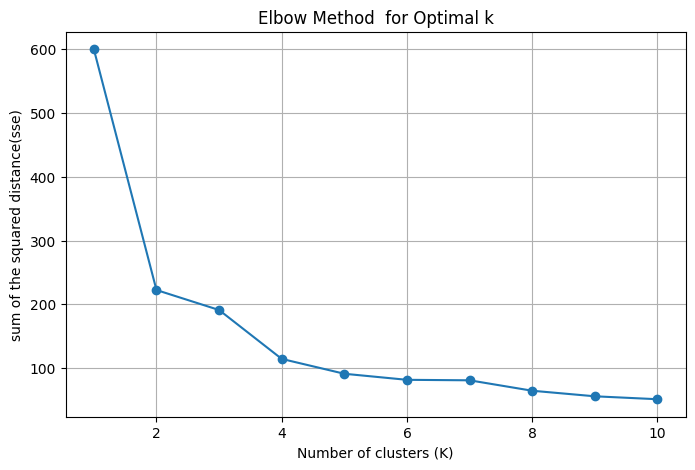

In [28]:
sse=[]
k_range=range(1,11)
for k in k_range:
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(x_scalled)
    sse.append(km.inertia_)
    
plt.figure(figsize=(8,5))
plt.plot(k_range,sse,marker='o')
plt.title('Elbow Method  for Optimal k')
plt.xlabel('Number of clusters (K)')
plt.ylabel('sum of the squared distance(sse)')

plt.grid(True)
plt.show()

    